# Repaso Primera Clase / Limpieza de Datos
Acá buscamos mejorar la calidad de los datos antes de pasarselos a la red

In [115]:
import pandas as pd #Pandas: librería para trabajar con data sets
data = pd.read_csv("https://raw.githubusercontent.com/Club-datos-FCEN/ClubDeDatos/main/2022/01%20-%20Propiedades/CABAprop.csv")  #cargo los datos
data.shape

(58571, 10)

Para pasarle los datos a la Red Neuronal, no podemos tener datos faltantes. Como en la columna bedrooms faltaban muchos, decidimos primero filtrar una propiedad rara (con 130 dormitorios) y después ignoramos (tiramos) esa columna entera. Después tiramos todas las filas a las que le faltara alguno de los otros datos.

In [116]:
data.isna().sum()

lat                    0
lon                    0
rooms               5034
bedrooms           23868
bathrooms           2964
surface_total       3245
surface_covered     2789
price                  0
property_type          0
barrio                 0
dtype: int64

In [117]:
data = data[data["bedrooms"] != 130]
data = data.drop(columns="bedrooms")
data = data.dropna()
data.isna().sum()

lat                0
lon                0
rooms              0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
barrio             0
dtype: int64

In [118]:
# Veamos como quedó el dataset
data.describe()

,lat,lon,rooms,bathrooms,surface_total,surface_covered,price
count,48652.000000,48652.000000,48652.000000,48652.000000,48652.000000,48652.000000,4.865200e+04
mean,-34.597904,-58.436370,2.787779,1.480453,100.569596,84.186549,2.357235e+05
std,0.024446,0.036168,1.373587,0.806777,834.842645,594.660208,2.124950e+05
min,-34.696419,-58.530468,1.000000,1.000000,10.000000,2.000000,4.000000e+04
25%,-34.613408,-58.460234,2.000000,1.000000,45.000000,40.000000,1.185000e+05
50%,-34.598219,-58.434238,3.000000,1.000000,66.000000,59.000000,1.690000e+05
75%,-34.581737,-58.410998,4.000000,2.000000,105.000000,90.000000,2.700000e+05
max,-34.536134,-58.356937,32.000000,14.000000,126062.000000,126062.000000,2.000000e+06


Ahora, notamos algo sobre los tipos de propiedad. Capaz es muy dificil predecir bien el precio de casas, PHs y Departamentos. Podriamos enfocarnos sólo en uno. Veamos cómo están distribuidos nuestros datos:

In [119]:
data['property_type'].value_counts()

Departamento    41887
PH               4796
Casa             1969
Name: property_type, dtype: int64

Hay muy pocas casas y PHs! (Relativo a los deptos). Capaz sea muy dificil predecir sus precios. Concentremonos sólo en los deptos:

In [120]:
data = data[data["property_type"] == "Departamento"]
data = data.drop(columns = "property_type")
data.head()

,lat,lon,rooms,bathrooms,surface_total,surface_covered,price,barrio
6,-34.54307,-58.462586,1.0,1.0,44.0,38.0,147000.0,Nuñez
7,-34.60152,-58.424350,1.0,1.0,40.0,37.0,92294.0,Almagro
8,-34.60152,-58.424350,1.0,1.0,49.0,44.0,115000.0,Almagro
9,-34.60152,-58.424350,1.0,1.0,40.0,37.0,77000.0,Almagro
10,-34.60152,-58.424350,1.0,1.0,40.0,37.0,88900.0,Almagro


Hagamos un grafiquito para ver cómo está distribuido lo que queremos predecir

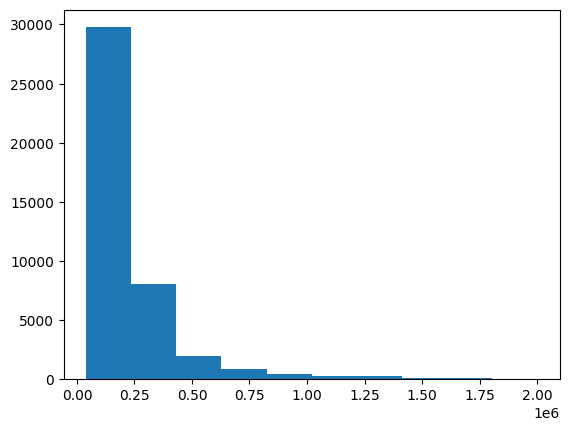

In [121]:
import matplotlib.pyplot as plt
plt.hist(data["price"])
plt.show()

# Convirtiendo los Valores Categóricos
Recordemos que a nuestra red neuronal le tenemos que pasar como entrada numeritos. Pero veamos cómo quedaron los datos

In [122]:
data.head()

,lat,lon,rooms,bathrooms,surface_total,surface_covered,price,barrio
6,-34.54307,-58.462586,1.0,1.0,44.0,38.0,147000.0,Nuñez
7,-34.60152,-58.424350,1.0,1.0,40.0,37.0,92294.0,Almagro
8,-34.60152,-58.424350,1.0,1.0,49.0,44.0,115000.0,Almagro
9,-34.60152,-58.424350,1.0,1.0,40.0,37.0,77000.0,Almagro
10,-34.60152,-58.424350,1.0,1.0,40.0,37.0,88900.0,Almagro


La columna barrio tiene texto! Este tipo de datos se los suele llamar "categóricos". Qué vamos a hacer?

Una manera de enfrentar este problema es asignarle a cada barrio un número, capaz al azar, capaz en orden alfabético. Esto se puede haer con la función `.factorize()` Sin embargo, hay problemas con esta propuesta. Capaz dos barrios muy distintos o lejos geográficamente, como Boedo y Belgrano, terminan cerca numéricamente. Es decir que, por ejemplo, para la red Belgrano se parecería más a Boedo que a Recoleta. Esto se podría evitar si armaramos el orden de modo que represente algo real, capaz ordenandolos según cuál barrio es, en promedio, más caro. Pero sería un trabajo manual y capaz introducimos sesgos.

Hay una alternativa, aunque capaz al principio parece que estamos complicando el problema mucho. Podriamos separar la variable barrio en una variable por cada barrio, que va a valer 0 o 1 dependiendo de si la propiedad no está o está en ese barrio. Esta técnica es muy común para este tipo de problema, y se conoce como *one-hot encoding*.

Ojo, siendo que tenemos longitud y latitud, podríamos ignorar la columna de barrios y dejar que la red detecte sola las zonas más caras. Incluso podríamos entrenar otra red que, en base a las coordenadas, sepa a qué barrio pertenece. Pero no nos vayamos por las ramas.

**TL;DR:** vamos a aplicar one-hot encoding

In [123]:
data = pd.get_dummies(data)
data.head()

,lat,lon,rooms,bathrooms,surface_total,surface_covered,price,barrio_Abasto,barrio_Agronomía,barrio_Almagro,...,barrio_Villa Lugano,barrio_Villa Luro,barrio_Villa Ortuzar,barrio_Villa Pueyrredón,barrio_Villa Real,barrio_Villa Riachuelo,barrio_Villa Santa Rita,barrio_Villa Soldati,barrio_Villa Urquiza,barrio_Villa del Parque
6,-34.54307,-58.462586,1.0,1.0,44.0,38.0,147000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-34.60152,-58.424350,1.0,1.0,40.0,37.0,92294.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,-34.60152,-58.424350,1.0,1.0,49.0,44.0,115000.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,-34.60152,-58.424350,1.0,1.0,40.0,37.0,77000.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,-34.60152,-58.424350,1.0,1.0,40.0,37.0,88900.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [124]:
# Veamos como nos aumentó el tamaño del input. Ahora tenemos 64 columnas
data.shape

(41887, 64)

# Separando los datos
A la red no vamos a querer pasarle como input los precios (va a ser muy fácil predecir así!).

In [125]:
# Separo mis datos: quiero predecir el precio entonces saco esa columna
data_input = data.drop(columns="price") 
precios = data["price"] 

Tampoco vamos a pasarle todos los datos que tenemos, porque podría memorizarselos todos. Para ver si se está memorizando los datos específicos, lo que hacemos es separar nuestro Dataset en datos de entrenamiento (train) y de validación (test). Si a la red le va bien sobre los datos de entrenamiento pero no tanto en los de validación, probablemente se esté memorizando los de entrenamiento. Este problema se conoce como *overfitting*, y después vemos qué se puede hacer para solucionarlo.

In [126]:
from sklearn.model_selection import train_test_split

# test_size controla la proporción entre train/test. 0.2 quiere decir 20% de datos de prueba.
x_train, x_test, y_train, y_test = train_test_split(data_input,precios,test_size=0.2)

# x_train = input de entenamiento, 
# x_test = input de validación,
# y_train = output de entrenamiento, etc...

In [127]:
# Con cuantos datos vamos a estar entrenando? Nos parecen suficientes?
x_train.shape

(33509, 63)

In [128]:
#Armado de red neuronal --> capas
from tensorflow import keras

modelo = keras.Sequential([
    # 256 neuronas en esta capa, funcion de activacion (relu)
    # tengo 63 inputs
    keras.layers.Dense(256,activation ="relu",input_shape = (63,)), 

    keras.layers.Dense(128,activation = "relu"),
    keras.layers.Dense(64,activation = "relu"),
    keras.layers.Dense(16,activation = "relu"),

    # La capa de salida debería tener una sola neurona porque estamos prediciendo una única variable
    # OJO! La activación ReLU no permite valores negativos. En nuestro caso el precio no va a ser negativo, asi que no nos interesa.
    # Si el output pudiera ser negativo, podemos usar "linear" (sin función de activación) para esta capa.
    keras.layers.Dense(1,activation = "relu")
])

# Funcion de perdida: cuantifica qué tan malo es mi modelo 
# mse = mean square error
# mae = mean absolute error
# El optimizador define algunos parametros sobre como se hacen los pasos de entrenamiento. No le damos tanta bola.
modelo.compile(optimizer="adam", loss="mse")  

In [129]:
# Podemos hacer un resumen de nuestra red. Tiene 58.593 parametros en total
modelo.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 256)               16384     
                                                                 
 dense_36 (Dense)            (None, 128)               32896     
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 16)                1040      
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 58,593
Trainable params: 58,593
Non-trainable params: 0
_________________________________________________________________


In [130]:
# Vemos que el modelo arranca con pesos aleatorios y sesgos en 0
modelo.get_weights()

[array([[-0.12542208,  0.11490375, -0.08095552, ...,  0.05185603,
         -0.07987149, -0.12295874],
        [ 0.05531847,  0.13080478, -0.09682834, ..., -0.03908843,
          0.10942572,  0.07212672],
        [-0.08150351, -0.01679867,  0.07816456, ..., -0.02853029,
          0.04134773,  0.0596378 ],
        ...,
        [-0.01568412, -0.03647338,  0.12410489, ..., -0.10032755,
         -0.00934389,  0.08094908],
        [ 0.036167  , -0.01393743,  0.07727799, ..., -0.10196735,
          0.00361525,  0.01559865],
        [ 0.12992457, -0.00576089, -0.08216711, ..., -0.07042211,
          0.08340783,  0.11001416]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [131]:
# le digo que entrene. Epochs es la cantidad de pasos de entrenamiento
historial = modelo.fit(x_train, y_train, epochs=10)

Epoch 1/10
1048/1048 [==============================] - 4s 3ms/step - loss: 50774736896.0000
Epoch 2/10
1048/1048 [==============================] - 4s 3ms/step - loss: 23841216512.0000
Epoch 3/10
1048/1048 [==============================] - 4s 3ms/step - loss: 12734630912.0000
Epoch 4/10
1048/1048 [==============================] - 3s 3ms/step - loss: 11856100352.0000
Epoch 5/10
1048/1048 [==============================] - 3s 3ms/step - loss: 11304057856.0000
Epoch 6/10
1048/1048 [==============================] - 3s 3ms/step - loss: 10933761024.0000
Epoch 7/10
1048/1048 [==============================] - 3s 3ms/step - loss: 10493075456.0000
Epoch 8/10
1048/1048 [==============================] - 3s 3ms/step - loss: 10061315072.0000
Epoch 9/10
1048/1048 [==============================] - 3s 3ms/step - loss: 9826893824.0000
Epoch 10/10
1048/1048 [==============================] - 3s 3ms/step - loss: 9576416256.0000


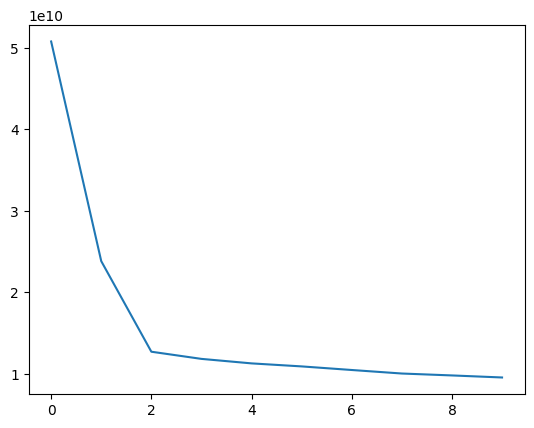

In [132]:
# En la variable historial me quedó la pérdida del modelo a lo largo del entrenamiento
plt.plot(historial.history["loss"])
plt.show()

In [133]:
# Para ver cuanto error tenemos en promedio, le tomamos raiz cuadrada al error cuadrático medio
# Anda en 98.000 dolares
import numpy as np
np.sqrt(historial.history["loss"])

array([225332.50297283, 154406.01190368, 112847.82191961, 108885.72152491,
       106320.54296325, 104564.62606446, 102435.7137721 , 100306.10685297,
        99130.69062606,  97859.16541643])

262/262 [==============================] - 1s 2ms/step


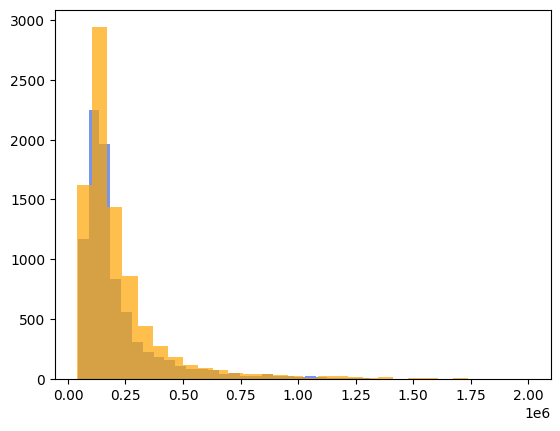

In [134]:
# Puedo usar el modelo para predecir el valor de casas en el set de validación
y_pred = modelo.predict(x_test)

# Y después graficarlo junto a los precios 
plt.hist(y_pred, bins=30,alpha=0.7, color="royalblue") #predicción
plt.hist(y_test, bins=30,alpha=0.7, color="orange")    #precios reales
plt.show()

# Mejorando la Red
Algo que notamos del último gráfico es que la distribución de precios es muy despareja, y un par de precios altos pueden estar corriendonos los promedios para arriba

In [135]:
# Probamos cambiar mse por mae. No elevo al cuadrado
# Ahora los errores grandes, generalmente causado por las propiedades más caras, no afectan tanto a la pérdida
# Ahora el error medio es de 45 mil dolares
modelo2 = keras.Sequential([
    keras.layers.Dense(256,activation ="relu",input_shape = (63,)),
    keras.layers.Dense(128,activation = "relu"),
    keras.layers.Dense(64,activation = "relu"),
    keras.layers.Dense(16,activation = "relu"),
    keras.layers.Dense(1,activation = "relu")
])

modelo.compile(optimizer="adam", loss="mae")
historial2 = modelo.fit(x_train, y_train, epochs=10)


Epoch 1/10
1048/1048 [==============================] - 4s 3ms/step - loss: 49056.4727
Epoch 2/10
1048/1048 [==============================] - 3s 3ms/step - loss: 47569.1094
Epoch 3/10
1048/1048 [==============================] - 3s 3ms/step - loss: 46547.6914
Epoch 4/10
1048/1048 [==============================] - 3s 3ms/step - loss: 46456.8125
Epoch 5/10
1048/1048 [==============================] - 3s 3ms/step - loss: 46141.3281
Epoch 6/10
1048/1048 [==============================] - 3s 3ms/step - loss: 45882.2539
Epoch 7/10
1048/1048 [==============================] - 3s 3ms/step - loss: 45626.2422
Epoch 8/10
1048/1048 [==============================] - 4s 4ms/step - loss: 45638.1992
Epoch 9/10
1048/1048 [==============================] - 4s 3ms/step - loss: 45621.5742
Epoch 10/10
1048/1048 [==============================] - 4s 4ms/step - loss: 45325.0781


Para ver mejor la distribución de precios, podemos usar un boxplot:
https://es.wikipedia.org/wiki/Diagrama_de_caja

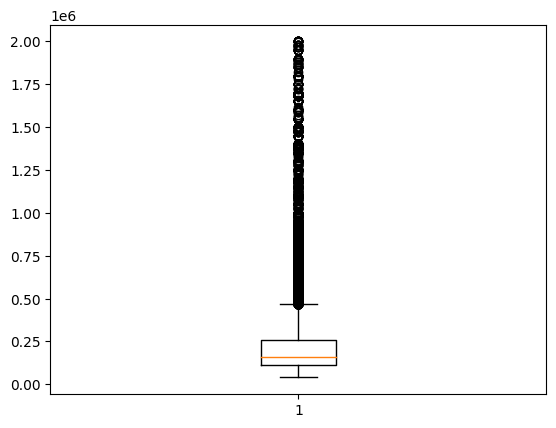

In [136]:
plt.boxplot(precios)
plt.show() 
# y = millones de dolares
# Linea naranja: mediana (separa los datos en 50%) --> la mitad de las propiedades esta por debajo de los 250.000 dolares
# Bordes inferior y superior de la caja: 1º cuartil y 3º cuartil (separa los datos en 25%). 
# Los puntos son "outliers", valores que están muy alejados del resto

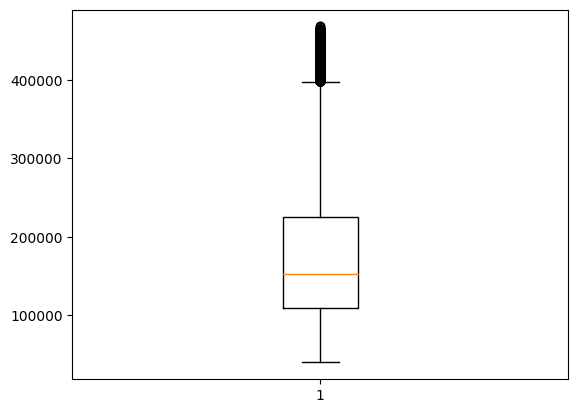

In [137]:
# Saco a los outliers usando el rango interquartil (magia rara de los estadistas)
q1 = precios.quantile(0.25)
q3 = precios.quantile(0.75)
rango = q3 - q1

umbral_arriba = q3 + 1.5*rango
umbral_abajo = q1 - 1.5*rango

sin_outliers = data[(data["price"]>umbral_abajo) & (data["price"]<umbral_arriba)]

plt.boxplot(sin_outliers["price"])
plt.show()

In [138]:
# Vuelvo a separar los datos, pero ahora con el dataset limpiado de outliers

sin_outliers_input = sin_outliers.drop(columns="price")
precios_sin_outliers = sin_outliers["price"]
x_train, x_test, y_train, y_test = train_test_split(sin_outliers_input,precios_sin_outliers,test_size=0.2)

In [139]:
#mejoro la prediccion --> 27000 dolares de error
modelo3 = keras.Sequential([
    keras.layers.Dense(256,activation ="relu",input_shape = (63,)),
    keras.layers.Dense(128,activation = "relu"),
    keras.layers.Dense(64,activation = "relu"),
    keras.layers.Dense(16,activation = "relu"),
    keras.layers.Dense(1,activation = "relu")
])

modelo3.compile(optimizer="adam", loss="mae")
historial3 = modelo3.fit(x_train, y_train, epochs=10)

Epoch 1/10
958/958 [==============================] - 4s 3ms/step - loss: 27854.5957
Epoch 2/10
958/958 [==============================] - 3s 3ms/step - loss: 27731.2695
Epoch 3/10
958/958 [==============================] - 4s 4ms/step - loss: 27637.4277
Epoch 4/10
958/958 [==============================] - 3s 3ms/step - loss: 27456.1504
Epoch 5/10
958/958 [==============================] - 3s 3ms/step - loss: 27439.1777
Epoch 6/10
958/958 [==============================] - 3s 3ms/step - loss: 27366.0938
Epoch 7/10
958/958 [==============================] - 3s 3ms/step - loss: 27225.0469
Epoch 8/10
958/958 [==============================] - 3s 3ms/step - loss: 27330.1914
Epoch 9/10
958/958 [==============================] - 3s 3ms/step - loss: 27398.8301
Epoch 10/10
958/958 [==============================] - 3s 3ms/step - loss: 27311.2949
